In [147]:
import os
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import sqlalchemy
import sqlite3

In [161]:
# , index_col=False
merged_df = pd.read_csv('data/df_merged.csv', index_col=False)
merged_df

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,...,is_original_title,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,19,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",6.0,Foodfight!,NaN,...,1.0,1.9,8248.0,26.0,"Dec 31, 2012",Foodfight!,45000000,0,73706,2012.0
1,51,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",27.0,The Secret Life of Walter Mitty,NaN,...,1.0,7.3,275300.0,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,2013.0
2,55,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",27.0,A Walk Among the Tombstones,NaN,...,1.0,6.5,105116.0,67.0,"Sep 19, 2014",A Walk Among the Tombstones,28000000,26017685,62108587,2014.0
3,57,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",45.0,Jurassic World,NaN,...,1.0,7.0,539338.0,34.0,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015.0
4,59,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",4.0,The Rum Diary,NaN,...,1.0,6.2,94787.0,16.0,"Oct 28, 2011",The Rum Diary,45000000,13109815,21544732,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,127671,tt8408152,Detention,Detention,2012,NaN,Horror,NaN,NaN,NaN,...,NaN,NaN,NaN,45.0,"Apr 13, 2012",Detention,10000000,0,0,2012.0
1501,129445,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,3.0,Fahrenheit 11/9,NaN,...,1.0,6.7,11628.0,29.0,"Sep 21, 2018",Fahrenheit 11/9,5000000,6352306,6653715,2018.0
1502,131155,tt8852552,Icarus,Icarus,2010,78.0,Thriller,NaN,NaN,NaN,...,NaN,NaN,NaN,91.0,"Feb 9, 2010",Icarus,6000000,0,0,2010.0
1503,134539,tt9347476,Believe,Believe,2016,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.0,"Dec 2, 2016",Believe,3500000,890303,890303,2016.0


In [162]:
merged_df.dtypes

Unnamed: 0             int64
movie_id              object
primary_title         object
original_title        object
start_year             int64
runtime_minutes      float64
genres                object
ordering             float64
title                 object
region               float64
language             float64
types                 object
attributes           float64
is_original_title    float64
averagerating        float64
numvotes             float64
id                   float64
release_date          object
movie                 object
production_budget      int64
domestic_gross         int64
worldwide_gross        int64
year                 float64
dtype: object

In [163]:
#kill persistent index
merged_df.drop('Unnamed: 0', axis=1, inplace=True)
merged_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,...,is_original_title,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",6.0,Foodfight!,NaN,NaN,...,1.0,1.9,8248.0,26.0,"Dec 31, 2012",Foodfight!,45000000,0,73706,2012.0
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",27.0,The Secret Life of Walter Mitty,NaN,NaN,...,1.0,7.3,275300.0,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,2013.0
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",27.0,A Walk Among the Tombstones,NaN,NaN,...,1.0,6.5,105116.0,67.0,"Sep 19, 2014",A Walk Among the Tombstones,28000000,26017685,62108587,2014.0
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",45.0,Jurassic World,NaN,NaN,...,1.0,7.0,539338.0,34.0,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015.0
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",4.0,The Rum Diary,NaN,NaN,...,1.0,6.2,94787.0,16.0,"Oct 28, 2011",The Rum Diary,45000000,13109815,21544732,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,tt8408152,Detention,Detention,2012,NaN,Horror,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,45.0,"Apr 13, 2012",Detention,10000000,0,0,2012.0
1501,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,3.0,Fahrenheit 11/9,NaN,NaN,...,1.0,6.7,11628.0,29.0,"Sep 21, 2018",Fahrenheit 11/9,5000000,6352306,6653715,2018.0
1502,tt8852552,Icarus,Icarus,2010,78.0,Thriller,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,91.0,"Feb 9, 2010",Icarus,6000000,0,0,2010.0
1503,tt9347476,Believe,Believe,2016,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.0,"Dec 2, 2016",Believe,3500000,890303,890303,2016.0


In [164]:
merged_df.dtypes

movie_id              object
primary_title         object
original_title        object
start_year             int64
runtime_minutes      float64
genres                object
ordering             float64
title                 object
region               float64
language             float64
types                 object
attributes           float64
is_original_title    float64
averagerating        float64
numvotes             float64
id                   float64
release_date          object
movie                 object
production_budget      int64
domestic_gross         int64
worldwide_gross        int64
year                 float64
dtype: object

In [165]:
# check valuse in primary_title vs original_title
merged_df['primary_title'].equals(merged_df['original_title'])  # Returns False


False

In [166]:
# drop useless columns
merged_df.drop(columns=['ordering', 'title', 'region', 'language', 'types', 
                        'attributes','is_original_title', 'id','movie','year'],
               axis='columns', inplace=True)
merged_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,"Dec 31, 2012",45000000,0,73706
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,"Dec 25, 2013",91000000,58236838,187861183
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,"Sep 19, 2014",28000000,26017685,62108587
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,"Jun 12, 2015",215000000,652270625,1648854864
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0,"Oct 28, 2011",45000000,13109815,21544732
...,...,...,...,...,...,...,...,...,...,...,...,...
1500,tt8408152,Detention,Detention,2012,NaN,Horror,NaN,NaN,"Apr 13, 2012",10000000,0,0
1501,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628.0,"Sep 21, 2018",5000000,6352306,6653715
1502,tt8852552,Icarus,Icarus,2010,78.0,Thriller,NaN,NaN,"Feb 9, 2010",6000000,0,0
1503,tt9347476,Believe,Believe,2016,NaN,NaN,NaN,NaN,"Dec 2, 2016",3500000,890303,890303


In [167]:
# convert release date to datetime
# merged_df['release_date'] = merged_df['release_date'].apply(lambda x: pd.datetime.strptime(x,'%d%b%Y'))
merged_df['release_date'] =  pd.to_datetime(merged_df['release_date'])

,movie_id,primary_title,original_title,start_year,release_month,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,2012-12-31,45000000,0,73706,12
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,2013-12-25,91000000,58236838,187861183,12
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,2014-09-19,28000000,26017685,62108587,9
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,2015-06-12,215000000,652270625,1648854864,6
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0,2011-10-28,45000000,13109815,21544732,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,tt8408152,Detention,Detention,2012,NaN,Horror,NaN,NaN,2012-04-13,10000000,0,0,4
1501,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628.0,2018-09-21,5000000,6352306,6653715,9
1502,tt8852552,Icarus,Icarus,2010,78.0,Thriller,NaN,NaN,2010-02-09,6000000,0,0,2
1503,tt9347476,Believe,Believe,2016,NaN,NaN,NaN,NaN,2016-12-02,3500000,890303,890303,12


In [171]:
merged_df= merged_df[['movie_id', 'primary_title', 'original_title', 'start_year','release_month',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes',
       'release_date', 'production_budget', 'domestic_gross',
       'worldwide_gross']]

In [168]:
# add column for release month
merged_df['release_month'] = merged_df['release_date'].dt.month
merged_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,release_month
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,2012-12-31,45000000,0,73706,12
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,2013-12-25,91000000,58236838,187861183,12
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,2014-09-19,28000000,26017685,62108587,9
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,2015-06-12,215000000,652270625,1648854864,6
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0,2011-10-28,45000000,13109815,21544732,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,tt8408152,Detention,Detention,2012,NaN,Horror,NaN,NaN,2012-04-13,10000000,0,0,4
1501,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628.0,2018-09-21,5000000,6352306,6653715,9
1502,tt8852552,Icarus,Icarus,2010,78.0,Thriller,NaN,NaN,2010-02-09,6000000,0,0,2
1503,tt9347476,Believe,Believe,2016,NaN,NaN,NaN,NaN,2016-12-02,3500000,890303,890303,12


In [172]:
merged_df

,movie_id,primary_title,original_title,start_year,release_month,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,12,91.0,"Action,Animation,Comedy",1.9,8248.0,2012-12-31,45000000,0,73706
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,12,114.0,"Adventure,Comedy,Drama",7.3,275300.0,2013-12-25,91000000,58236838,187861183
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,9,114.0,"Action,Crime,Drama",6.5,105116.0,2014-09-19,28000000,26017685,62108587
3,tt0369610,Jurassic World,Jurassic World,2015,6,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,2015-06-12,215000000,652270625,1648854864
4,tt0376136,The Rum Diary,The Rum Diary,2011,10,119.0,"Comedy,Drama",6.2,94787.0,2011-10-28,45000000,13109815,21544732
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,tt8408152,Detention,Detention,2012,4,NaN,Horror,NaN,NaN,2012-04-13,10000000,0,0
1501,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,9,128.0,Documentary,6.7,11628.0,2018-09-21,5000000,6352306,6653715
1502,tt8852552,Icarus,Icarus,2010,2,78.0,Thriller,NaN,NaN,2010-02-09,6000000,0,0
1503,tt9347476,Believe,Believe,2016,12,NaN,NaN,NaN,NaN,2016-12-02,3500000,890303,890303


In [175]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           1505 non-null   object        
 1   primary_title      1505 non-null   object        
 2   original_title     1505 non-null   object        
 3   start_year         1505 non-null   int64         
 4   release_month      1505 non-null   int64         
 5   runtime_minutes    1487 non-null   float64       
 6   genres             1499 non-null   object        
 7   averagerating      1465 non-null   float64       
 8   numvotes           1465 non-null   float64       
 9   release_date       1505 non-null   datetime64[ns]
 10  production_budget  1505 non-null   int64         
 11  domestic_gross     1505 non-null   int64         
 12  worldwide_gross    1505 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory us

In [184]:
# convert runtime_minutes and numvotes from float to int
merged_df = merged_df.astype({"runtime_minutes" : "int", "numvotes": "int"})
merged_df

,movie_id,primary_title,original_title,start_year,release_month,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,12,91,"Action,Animation,Comedy",1.9,8248,2012-12-31,45000000,0,73706
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,12,114,"Adventure,Comedy,Drama",7.3,275300,2013-12-25,91000000,58236838,187861183
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,9,114,"Action,Crime,Drama",6.5,105116,2014-09-19,28000000,26017685,62108587
3,tt0369610,Jurassic World,Jurassic World,2015,6,124,"Action,Adventure,Sci-Fi",7.0,539338,2015-06-12,215000000,652270625,1648854864
4,tt0376136,The Rum Diary,The Rum Diary,2011,10,119,"Comedy,Drama",6.2,94787,2011-10-28,45000000,13109815,21544732
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,tt7784604,Hereditary,Hereditary,2018,6,127,"Drama,Horror,Mystery",7.3,151571,2018-06-08,10000000,44069456,70133905
1497,tt7785302,Spotlight,Spotlight,2015,11,99,Drama,8.0,12,2015-11-06,20000000,45055776,92088460
1498,tt7959026,The Mule,The Mule,2018,12,116,"Crime,Drama,Thriller",7.1,58955,2018-12-14,50000000,103804407,170857676
1499,tt8043306,Teefa in Trouble,Teefa in Trouble,2018,7,155,"Action,Comedy,Crime",7.4,2724,2018-07-20,1500000,0,98806


In [214]:
merged_df['profitability_index'] = merged_df['worldwide_gross'] / merged_df['production_budget']
merged_df

,movie_id,primary_title,original_title,start_year,release_month,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,profitability_index
0,tt0249516,Foodfight!,Foodfight!,2012,12,91,"Action,Animation,Comedy",1.9,8248,2012-12-31,45000000,0,73706,0.001638
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,12,114,"Adventure,Comedy,Drama",7.3,275300,2013-12-25,91000000,58236838,187861183,2.064409
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,9,114,"Action,Crime,Drama",6.5,105116,2014-09-19,28000000,26017685,62108587,2.218164
3,tt0369610,Jurassic World,Jurassic World,2015,6,124,"Action,Adventure,Sci-Fi",7.0,539338,2015-06-12,215000000,652270625,1648854864,7.669092
4,tt0376136,The Rum Diary,The Rum Diary,2011,10,119,"Comedy,Drama",6.2,94787,2011-10-28,45000000,13109815,21544732,0.478772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,tt7784604,Hereditary,Hereditary,2018,6,127,"Drama,Horror,Mystery",7.3,151571,2018-06-08,10000000,44069456,70133905,7.013390
1497,tt7785302,Spotlight,Spotlight,2015,11,99,Drama,8.0,12,2015-11-06,20000000,45055776,92088460,4.604423
1498,tt7959026,The Mule,The Mule,2018,12,116,"Crime,Drama,Thriller",7.1,58955,2018-12-14,50000000,103804407,170857676,3.417154
1499,tt8043306,Teefa in Trouble,Teefa in Trouble,2018,7,155,"Action,Comedy,Crime",7.4,2724,2018-07-20,1500000,0,98806,0.065871


In [213]:
merged_df.worldwide_gross.describe() #160,000,000

count    1.457000e+03
mean     1.419639e+08
std      2.352410e+08
min      0.000000e+00
25%      8.217571e+06
50%      5.246054e+07
75%      1.599465e+08
max      2.048134e+09
Name: worldwide_gross, dtype: float64

In [215]:
merged_df.profitability_index.describe()

count    1457.000000
mean        3.691895
std        12.182487
min         0.000000
25%         0.744915
50%         2.135069
75%         4.004564
max       416.564740
Name: profitability_index, dtype: float64

In [216]:
merged_df.loc[(merged_df['worldwide_gross'] > 160000000) & (merged_df['profitability_index'] > 4)]

,movie_id,primary_title,original_title,start_year,release_month,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,profitability_index
3,tt0369610,Jurassic World,Jurassic World,2015,6,124,"Action,Adventure,Sci-Fi",7.0,539338,2015-06-12,215000000,652270625,1648854864,7.669092
14,tt0435761,Toy Story 3,Toy Story 3,2010,6,103,"Adventure,Animation,Comedy",8.3,682218,2010-06-18,200000000,415004880,1068879522,5.344398
15,tt0443272,Lincoln,Lincoln,2012,11,150,"Biography,Drama,History",7.4,228701,2012-11-09,65000000,182207973,273346281,4.205327
17,tt0448694,Puss in Boots,Puss in Boots,2011,10,90,"Action,Adventure,Animation",6.6,133355,2011-10-28,130000000,149260504,554987477,4.269134
18,tt0451279,Wonder Woman,Wonder Woman,2017,6,141,"Action,Adventure,Fantasy",7.5,487527,2017-06-02,150000000,412563408,821133378,5.474223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,tt5726086,Insidious: The Last Key,Insidious: The Last Key,2018,1,103,"Horror,Mystery,Thriller",5.7,42154,2018-01-05,10000000,67745330,167885588,16.788559
1457,tt6343314,Creed II,Creed II,2018,11,130,"Drama,Sport",7.2,72503,2018-11-21,50000000,115715889,213591522,4.271830
1466,tt6644200,A Quiet Place,A Quiet Place,2018,4,90,"Drama,Horror,Sci-Fi",7.6,305031,2018-04-06,17000000,188024361,334522294,19.677782
1477,tt6966692,Green Book,Green Book,2018,11,130,"Biography,Comedy,Drama",8.3,204972,2018-11-16,23000000,85080171,322034439,14.001497


In [179]:
#drop rows with null values and inspect info
merged_df.dropna(inplace=True)
merged_df.info()

/var/folders/wf/s7j2jn9j1ns035j4rx9g3rzr0000gn/T/ipykernel_48992/817000644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.dropna(inplace=True)


In [188]:
over_100_gross = merged_df.loc[merged_df['worldwide_gross'] >= 100000000]
over_100_gross

,movie_id,primary_title,original_title,start_year,release_month,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,12,114,"Adventure,Comedy,Drama",7.3,275300,2013-12-25,91000000,58236838,187861183
3,tt0369610,Jurassic World,Jurassic World,2015,6,124,"Action,Adventure,Sci-Fi",7.0,539338,2015-06-12,215000000,652270625,1648854864
7,tt0398286,Tangled,Tangled,2010,11,100,"Adventure,Animation,Comedy",7.8,366366,2010-11-24,260000000,200821936,586477240
8,tt0401729,John Carter,John Carter,2012,3,132,"Action,Adventure,Sci-Fi",6.6,241792,2012-03-09,275000000,73058679,282778100
10,tt0429493,The A-Team,The A-Team,2010,6,117,"Action,Adventure,Thriller",6.8,235256,2010-06-11,110000000,77222099,177241171
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,tt6966692,Green Book,Green Book,2018,11,130,"Biography,Comedy,Drama",8.3,204972,2018-11-16,23000000,85080171,322034439
1479,tt7002100,Coco,Coco,2017,11,98,Horror,7.4,35,2017-11-22,175000000,209726015,798008101
1492,tt7401588,Instant Family,Instant Family,2018,11,118,"Comedy,Drama",7.4,46728,2018-11-16,48000000,67363237,119736188
1494,tt7535780,The Great Wall,The Great Wall,2017,2,72,Documentary,6.5,24,2017-02-17,150000000,45157105,334486852


In [189]:
over_100_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 1 to 1498
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           501 non-null    object        
 1   primary_title      501 non-null    object        
 2   original_title     501 non-null    object        
 3   start_year         501 non-null    int64         
 4   release_month      501 non-null    int64         
 5   runtime_minutes    501 non-null    int64         
 6   genres             501 non-null    object        
 7   averagerating      501 non-null    float64       
 8   numvotes           501 non-null    int64         
 9   release_date       501 non-null    datetime64[ns]
 10  production_budget  501 non-null    int64         
 11  domestic_gross     501 non-null    int64         
 12  worldwide_gross    501 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(4)
memory usa

In [190]:
# check valuse in primary_title vs original_title
over_100_gross['primary_title'].equals(over_100_gross['original_title'])  # Returns False


False

In [191]:
#find unique title values
over_100_gross["Unique"] = over_100_gross["primary_title"][~over_100_gross["original_title"].isin(over_100_gross["primary_title"])].drop_duplicates()


/var/folders/wf/s7j2jn9j1ns035j4rx9g3rzr0000gn/T/ipykernel_48992/1772117777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over_100_gross["Unique"] = over_100_gross["primary_title"][~over_100_gross["original_title"].isin(over_100_gross["primary_title"])].drop_duplicates()


In [197]:
over_100_gross[~over_100_gross['Unique'].isna()]


,movie_id,primary_title,original_title,start_year,release_month,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,Unique
267,tt1270798,X-Men: First Class,X: First Class,2011,6,131,"Action,Adventure,Sci-Fi",7.7,608930,2011-06-03,160000000,146408305,355408305,X-Men: First Class
290,tt1300854,Iron Man 3,Iron Man Three,2013,5,130,"Action,Adventure,Sci-Fi",7.2,692794,2013-05-03,200000000,408992272,1215392272,Iron Man 3
316,tt1327773,Lee Daniels' The Butler,The Butler,2013,8,132,"Biography,Drama",7.2,102468,2013-08-16,30000000,116632095,177025498,Lee Daniels' The Butler
397,tt1430626,The Pirates! Band of Misfits,The Pirates! In an Adventure with Scientists!,2012,4,88,"Adventure,Animation,Comedy",6.7,41958,2012-04-27,55000000,31051126,136143605,The Pirates! Band of Misfits
584,tt1649419,The Impossible,Lo imposible,2012,12,114,"Drama,History,Thriller",7.6,177762,2012-12-21,40000000,19019882,169590606,The Impossible
792,tt1985949,The Angry Birds Movie,Angry Birds,2016,5,97,"Action,Animation,Comedy",6.3,69624,2016-05-20,73000000,107509366,352327887,The Angry Birds Movie
1073,tt2820852,Furious 7,Furious Seven,2015,4,137,"Action,Crime,Thriller",7.2,335074,2015-04-03,190000000,353007020,1518722794,Furious 7
1243,tt3748528,Rogue One: A Star Wars Story,Rogue One,2016,12,133,"Action,Adventure,Sci-Fi",7.8,478592,2016-12-16,200000000,532177324,1049102856,Rogue One: A Star Wars Story


In [199]:
over_100_gross['profitability_index'] = over_100_gross['worldwide_gross'] / over_100_gross['production_budget']
over_100_gross

/var/folders/wf/s7j2jn9j1ns035j4rx9g3rzr0000gn/T/ipykernel_48992/3812173620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over_100_gross['profitability_index'] = over_100_gross['worldwide_gross'] / over_100_gross['production_budget']


,movie_id,primary_title,original_title,start_year,release_month,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,Unique,profitability_index
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,12,114,"Adventure,Comedy,Drama",7.3,275300,2013-12-25,91000000,58236838,187861183,NaN,2.064409
3,tt0369610,Jurassic World,Jurassic World,2015,6,124,"Action,Adventure,Sci-Fi",7.0,539338,2015-06-12,215000000,652270625,1648854864,NaN,7.669092
7,tt0398286,Tangled,Tangled,2010,11,100,"Adventure,Animation,Comedy",7.8,366366,2010-11-24,260000000,200821936,586477240,NaN,2.255682
8,tt0401729,John Carter,John Carter,2012,3,132,"Action,Adventure,Sci-Fi",6.6,241792,2012-03-09,275000000,73058679,282778100,NaN,1.028284
10,tt0429493,The A-Team,The A-Team,2010,6,117,"Action,Adventure,Thriller",6.8,235256,2010-06-11,110000000,77222099,177241171,NaN,1.611283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,tt6966692,Green Book,Green Book,2018,11,130,"Biography,Comedy,Drama",8.3,204972,2018-11-16,23000000,85080171,322034439,NaN,14.001497
1479,tt7002100,Coco,Coco,2017,11,98,Horror,7.4,35,2017-11-22,175000000,209726015,798008101,NaN,4.560046
1492,tt7401588,Instant Family,Instant Family,2018,11,118,"Comedy,Drama",7.4,46728,2018-11-16,48000000,67363237,119736188,NaN,2.494504
1494,tt7535780,The Great Wall,The Great Wall,2017,2,72,Documentary,6.5,24,2017-02-17,150000000,45157105,334486852,NaN,2.229912


In [201]:
over_100_gross.sort_values(by='profitability_index', ascending=False)

,movie_id,primary_title,original_title,start_year,release_month,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,Unique,profitability_index
488,tt1560985,The Devil Inside,The Devil Inside,2012,1,83,Horror,4.2,33522,2012-01-06,1000000,53262945,101759490,NaN,101.759490
471,tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010,10,91,Horror,5.7,93122,2010-10-20,3000000,84752907,177512032,NaN,59.170677
1393,tt5052448,Get Out,Get Out,2017,2,104,"Horror,Mystery,Thriller",7.7,400474,2017-02-24,5000000,176040665,255367951,NaN,51.073590
679,tt1778304,Paranormal Activity 3,Paranormal Activity 3,2011,10,83,"Horror,Mystery,Thriller",5.8,85689,2011-10-21,5000000,104028807,207039844,NaN,41.407969
1162,tt3322940,Annabelle,Annabelle,2014,10,99,"Horror,Mystery,Thriller",5.4,122039,2014-10-03,6500000,84273813,256862920,NaN,39.517372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,tt0780653,The Wolfman,The Wolfman,2010,2,103,"Drama,Fantasy,Horror",5.8,97873,2010-02-12,150000000,62189884,142634358,NaN,0.950896
207,tt1210819,The Lone Ranger,The Lone Ranger,2013,7,150,"Action,Adventure,Western",6.4,208827,2013-07-02,275000000,89302115,260002115,NaN,0.945462
321,tt1335975,47 Ronin,47 Ronin,2013,12,128,"Action,Adventure,Drama",6.3,135754,2013-12-25,175000000,38362475,151716815,NaN,0.866953
780,tt1972591,King Arthur: Legend of the Sword,King Arthur: Legend of the Sword,2017,5,126,"Action,Adventure,Drama",6.8,169054,2017-05-12,175000000,39175066,139630336,NaN,0.797888


In [203]:
import seaborn as sns

<AxesSubplot: xlabel='runtime_minutes', ylabel='profitability_index'>

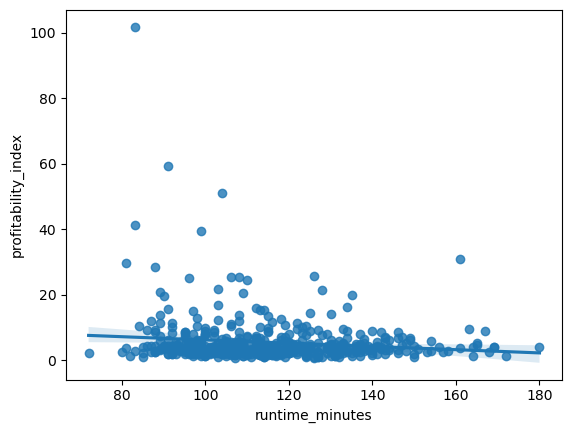

In [207]:
# data = over_100_gross
# x = 'runtime_minutes'
# y = 'profitability_index'
sns.regplot(data=over_100_gross ,x='runtime_minutes',y='profitability_index')

<AxesSubplot: xlabel='runtime_minutes', ylabel='worldwide_gross'>

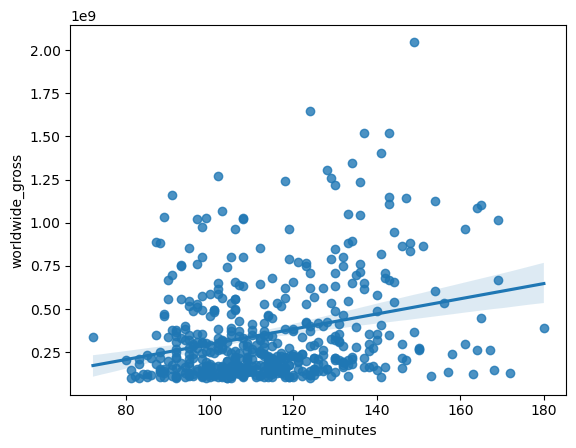

In [209]:
# data = over_100_gross
# x = 'runtime_minutes'
# y = 'profitability_index'
sns.regplot(data=over_100_gross ,x='runtime_minutes',y='worldwide_gross')

In [212]:
over_100_gross.worldwide_gross.describe()

count    5.010000e+02
mean     3.575569e+08
std      2.973896e+08
min      1.009297e+08
25%      1.537338e+08
50%      2.406476e+08
75%      4.575078e+08
max      2.048134e+09
Name: worldwide_gross, dtype: float64